#**Tugas 2**
##**Regresi menggunakan arsitektur Fully Connected Neural Network** 



In [56]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
assert len(tf.config.list_physical_devices('GPU')) > 0

### Dataset Boston Housing Price

download dataset Boston dari sklearn dan menentukan input(x) dan output(y), boston house memiliki 13 variabel data dengan jumlah data sebanyak 506 data

In [57]:
bc = datasets.load_boston()
X = bc.data
y = bc.target
X.shape, y.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

((506, 13), (506,))

### Mendefenisikan arsitektur fully connected layer
pendefenisian arsitektur fully connected neural network menggunakan API fungsi sequential() 

In [58]:
def build_fc_model():
  fc_model = tf.keras.Sequential([

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(13, activation=tf.nn.relu, input_shape=(13,)),
      tf.keras.layers.Dense(100, activation=tf.nn.relu),
      tf.keras.layers.Dense(100, activation=tf.nn.relu),
      tf.keras.layers.Dense(1) 
      
  ])
  return fc_model

model = build_fc_model()

###Melakukan compile dengan menggunakan Optimizer Adam dan learning rate=0.001, loss"MSE" dan metrics "MAE"

In [59]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='mse',
              metrics=['mae'])


###Training Data

In [60]:
BATCH_SIZE = 32
EPOCHS = 500
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
hasilAdam = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2)
model.save('modelAdam')

Epoch 1/500
9/9 [==============================] - 1s 17ms/step - loss: 138.1048 - mae: 8.9708 - val_loss: 127.1874 - val_mae: 9.3256
Epoch 2/500
9/9 [==============================] - 0s 5ms/step - loss: 105.1956 - mae: 7.9589 - val_loss: 102.6047 - val_mae: 8.3097
Epoch 3/500
9/9 [==============================] - 0s 5ms/step - loss: 86.5486 - mae: 6.8301 - val_loss: 77.9112 - val_mae: 5.9652
Epoch 4/500
9/9 [==============================] - 0s 5ms/step - loss: 85.2736 - mae: 6.9954 - val_loss: 92.9707 - val_mae: 6.8009
Epoch 5/500
9/9 [==============================] - 0s 5ms/step - loss: 82.2009 - mae: 6.8533 - val_loss: 81.3779 - val_mae: 6.6186
Epoch 6/500
9/9 [==============================] - 0s 5ms/step - loss: 85.1151 - mae: 6.8510 - val_loss: 76.3579 - val_mae: 6.2573
Epoch 7/500
9/9 [==============================] - 0s 5ms/step - loss: 79.0602 - mae: 6.3387 - val_loss: 85.4076 - val_mae: 7.1341
Epoch 8/500
9/9 [==============================] - 0s 5ms/step - loss: 83.8079

##Menampilkan hasil

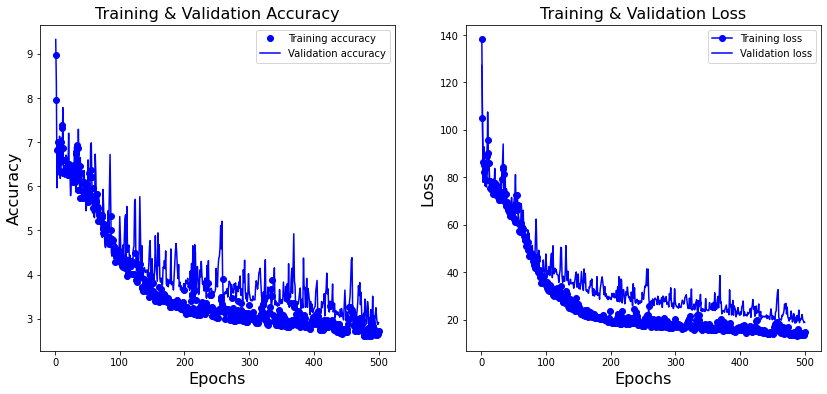

In [61]:
import matplotlib.pyplot as plt
 
history_dict = hasilAdam.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo-', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()